In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Depression Professional Dataset.csv')
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


# Explore the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   object 
 1   Age                                    2054 non-null   int64  
 2   Work Pressure                          2054 non-null   float64
 3   Job Satisfaction                       2054 non-null   float64
 4   Sleep Duration                         2054 non-null   object 
 5   Dietary Habits                         2054 non-null   object 
 6   Have you ever had suicidal thoughts ?  2054 non-null   object 
 7   Work Hours                             2054 non-null   int64  
 8   Financial Stress                       2054 non-null   int64  
 9   Family History of Mental Illness       2054 non-null   object 
 10  Depression                             2054 non-null   object 
dtypes: f

In [3]:
df.describe()

,Age,Work Pressure,Job Satisfaction,Work Hours,Financial Stress
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,42.171860,3.021908,3.015093,5.930867,2.978578
std,11.461202,1.417312,1.418432,3.773945,1.413362
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,35.000000,2.000000,2.000000,3.000000,2.000000
50%,43.000000,3.000000,3.000000,6.000000,3.000000
75%,51.750000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,12.000000,5.000000


In [4]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'Depression']
num_cols = [col for col in df.columns if df[col].dtype != 'object' and col != 'Depression']
target_col = 'Depression'
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)
print("Target column:", target_col)

Categorical columns: ['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
Numerical columns: ['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours', 'Financial Stress']
Target column: Depression


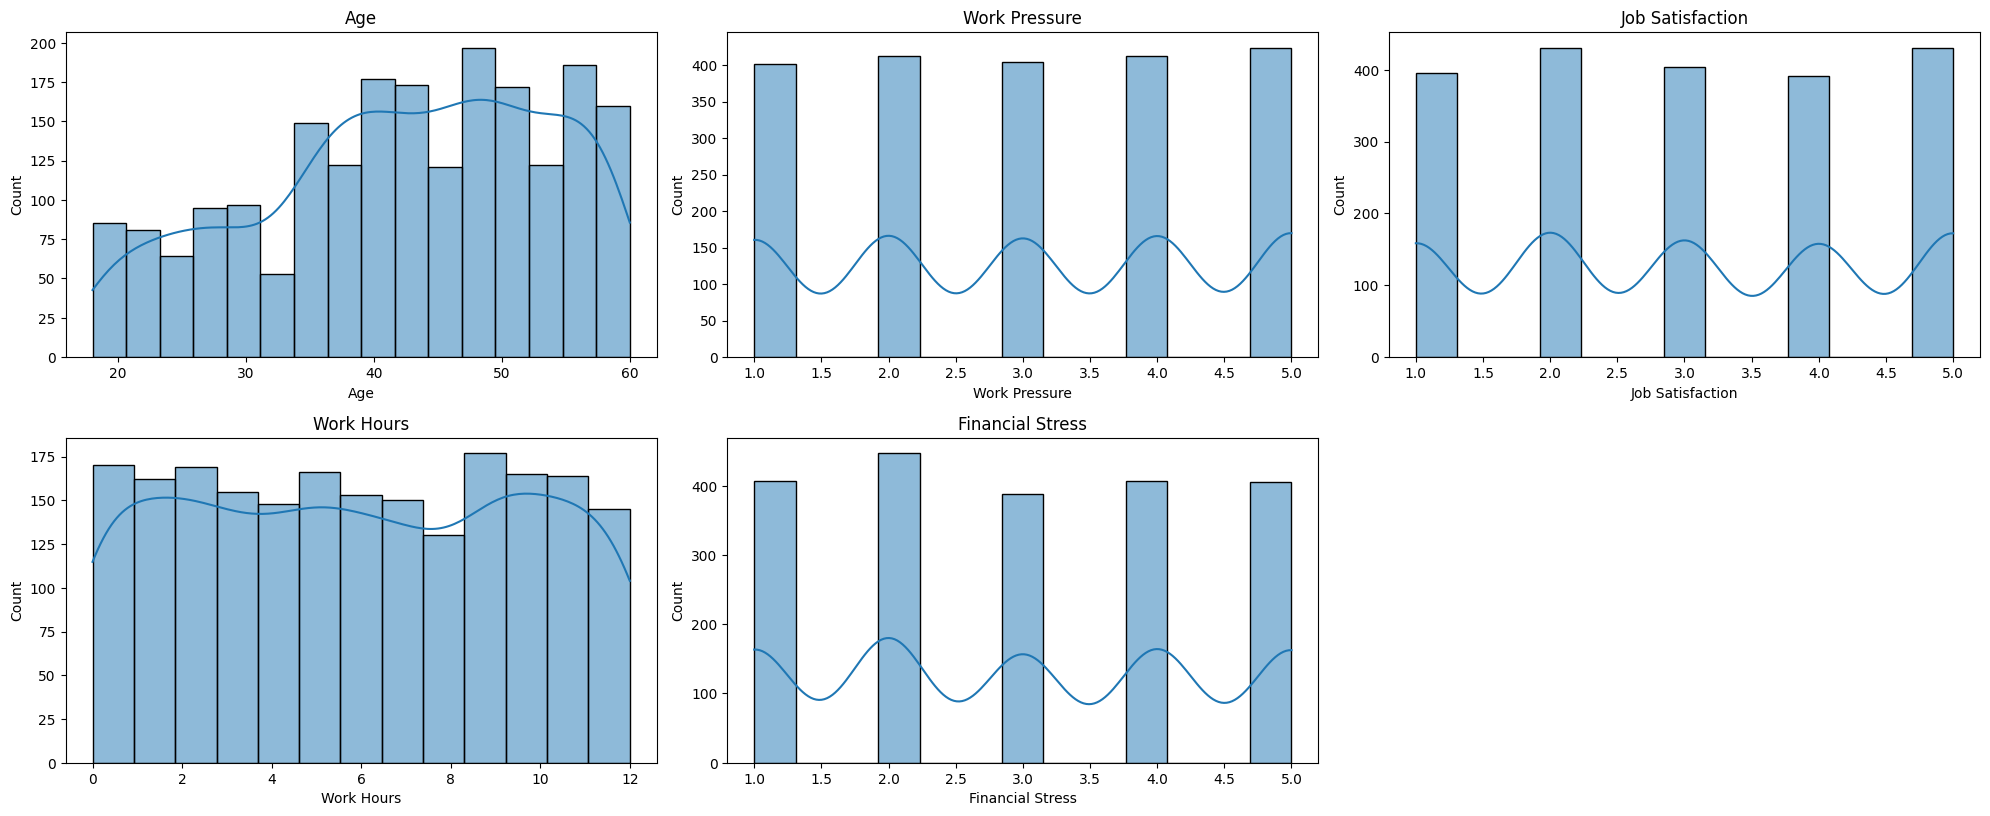

In [5]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_cols):
    plt.subplot(5, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

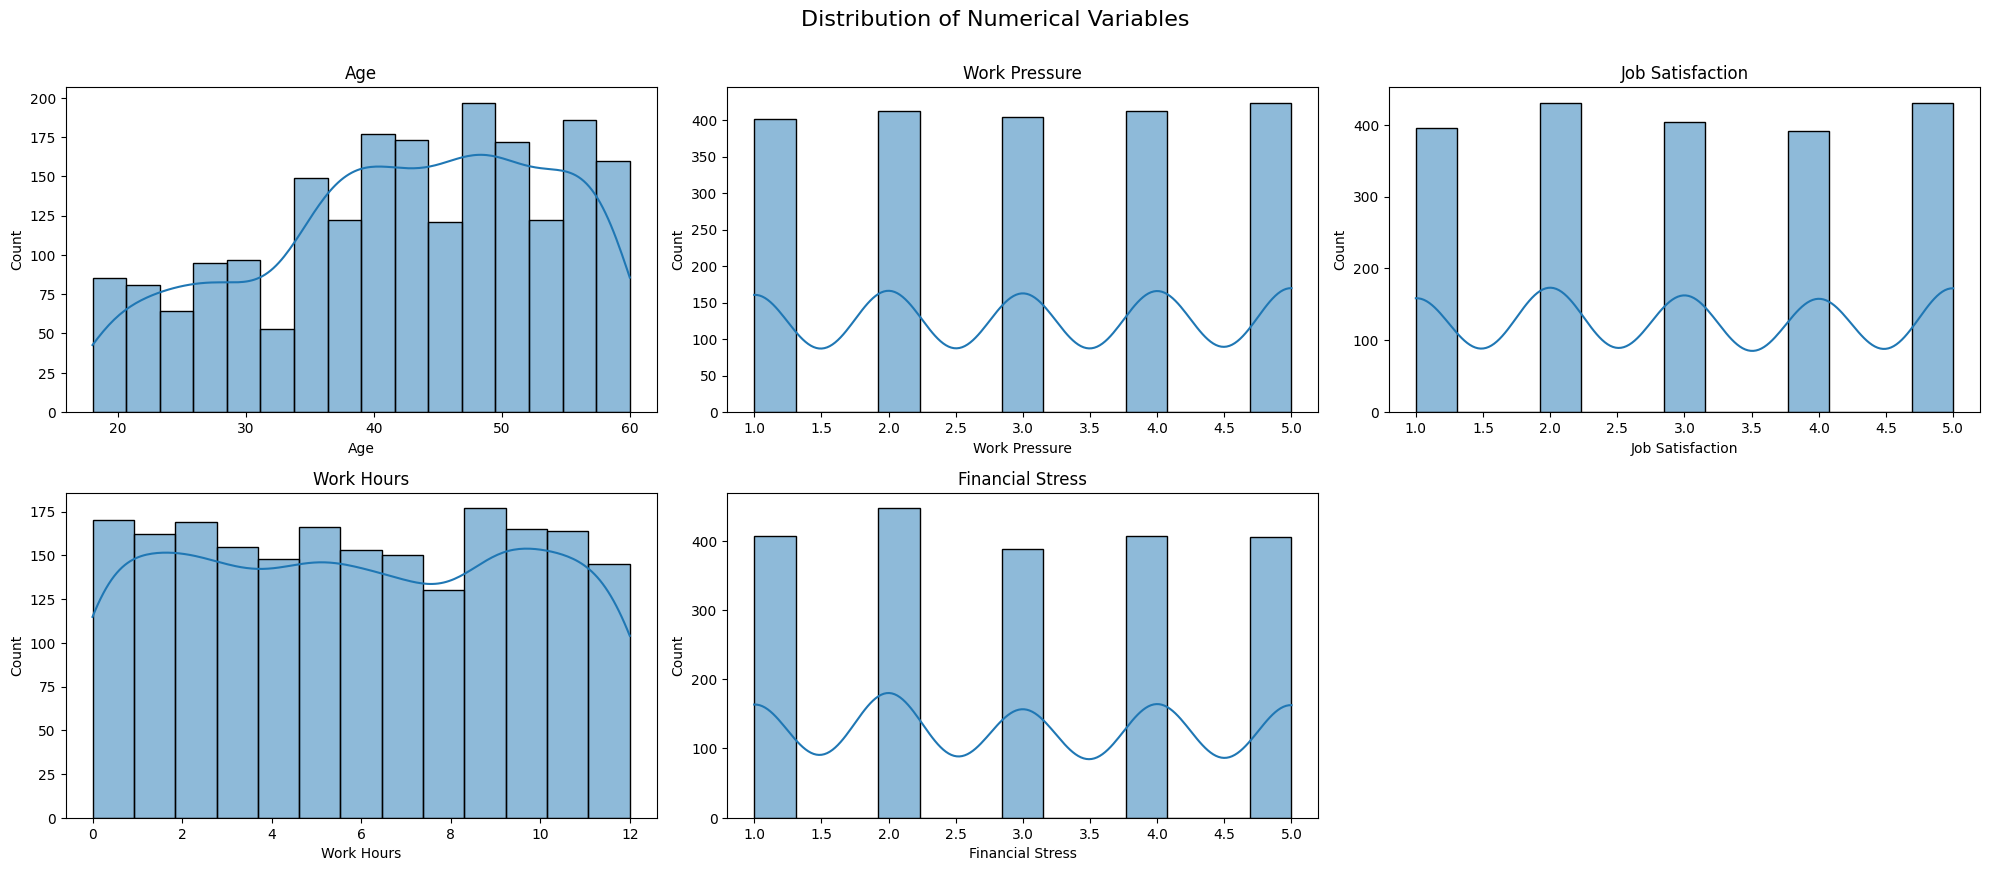

In [6]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_cols):
    plt.subplot(5, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)
plt.show()

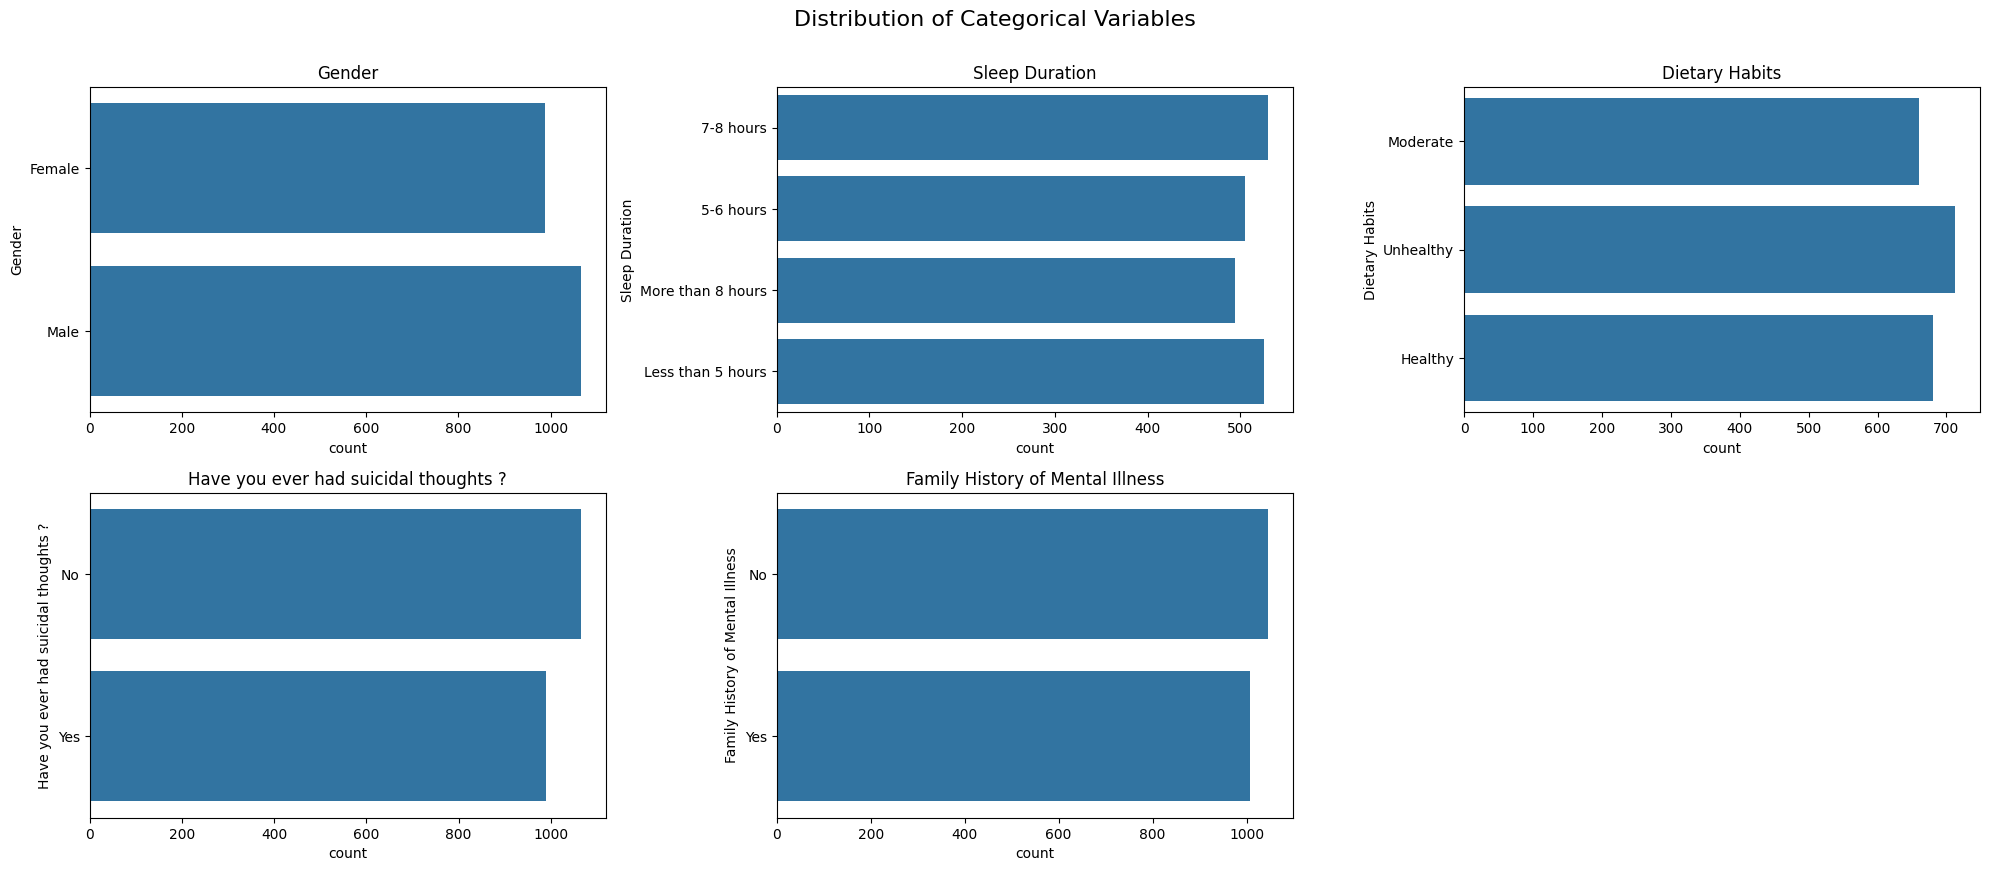

In [7]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_cols):
    if col != 'Depression':
        plt.subplot(5, 3, i+1)
        sns.countplot(y=col, data=df)
        plt.title(col)
plt.tight_layout()
plt.suptitle('Distribution of Categorical Variables', fontsize=16, y=1.02)
plt.show()

The dataset is highly unbalanced.
The fraction of patients with depression is 0.0988315481986368
The fraction of patients without depression is 0.9011684518013632


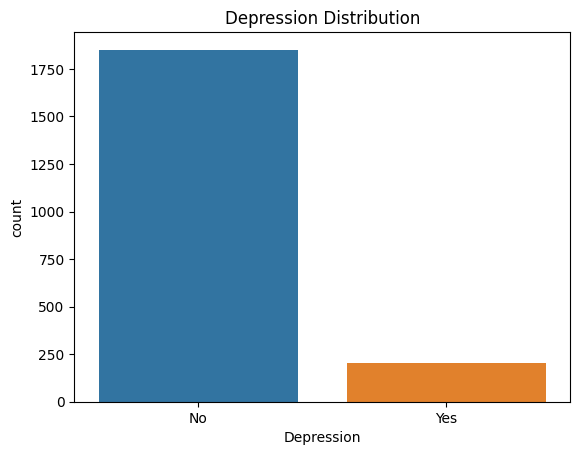

In [8]:
print("The dataset is highly unbalanced.")
print("The fraction of patients with depression is", df['Depression'].value_counts()['Yes'] / len(df))
print("The fraction of patients without depression is", df['Depression'].value_counts()['No'] / len(df))

sns.countplot(data=df, x='Depression', hue="Depression")
plt.title('Depression Distribution')
plt.show()

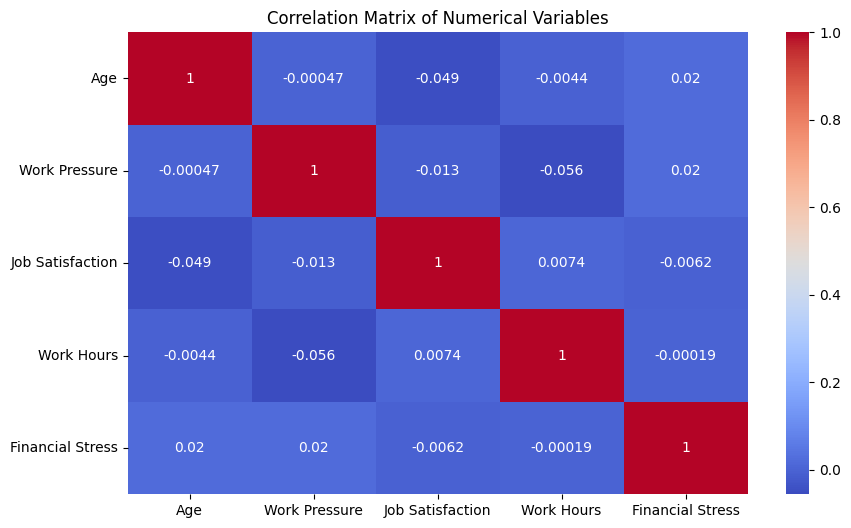

In [9]:
plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix of Numerical Variables')
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

# Data preparation
There will be two versions of the dataset:
- One with one-hotencoded categorical variables
- One with original categorical variables (for CatBoost)

### The models used:
- Logistic Regression
- Random Forest
- Decision Tree
- Naive Bayes
- CatBoost
- XGBoost

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [11]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

target_col = 'Depression'

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

X_train, y_train = df_train.drop(columns=[target_col]), df_train[target_col].map({'Yes': 1, 'No': 0})
X_test, y_test = df_test.drop(columns=[target_col]), df_test[target_col].map({'Yes': 1, 'No': 0})

print(f"Train dataset size: {len(df_train)}")
print(f"Test dataset size: {len(df_test)}")

Train dataset size: 1643
Test dataset size: 411


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

In [13]:
results = []
model_results = {}
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_processed, y_train)
    preds = model.predict(X_test_processed)
    results.append({'Model': model_name,
        'accuracy': accuracy_score(y_test, preds),
        'f1': f1_score(y_test, preds),
        'precision': precision_score(y_test, preds),
        'recall': recall_score(y_test, preds)})
    model_results[model_name] = model

In [24]:
cat = CatBoostClassifier(class_weights={0: 1, 1: 10}, cat_features=cat_cols, verbose=0)
cat.fit(X_train, y_train)
preds = cat.predict(X_test)
results.append({'Model': 'CatBoost',
    'accuracy': accuracy_score(y_test, preds),
    'f1': f1_score(y_test, preds),
    'precision': precision_score(y_test, preds),
    'recall': recall_score(y_test, preds)})
model_results["CatBoost"] = cat

In [25]:
pd.DataFrame(results).sort_values(by='f1', ascending=False)

,Model,accuracy,f1,precision,recall
0,Logistic Regression,0.987835,0.938272,1.000000,0.883721
5,CatBoost,0.970803,0.866667,0.829787,0.906977
6,CatBoost,0.970803,0.866667,0.829787,0.906977
4,XGBoost,0.965937,0.815789,0.939394,0.720930
3,Naive Bayes,0.961071,0.789474,0.909091,0.697674
1,Random Forest,0.944039,0.646154,0.954545,0.488372
2,Decision Tree,0.917275,0.585366,0.615385,0.558140


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_auc(models_dict, X_test_processed, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']
    
    
    for (name, model), color in zip(models_dict.items(), colors):
        if name == 'CatBoost':
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
        
        
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        
        plt.plot(fpr, tpr, color=color, 
                 label=f'{name} (AUC = {roc_auc:.2f})')
    
    
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', 
             label='Random Guess')
    
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.tight_layout()
    plt.show()

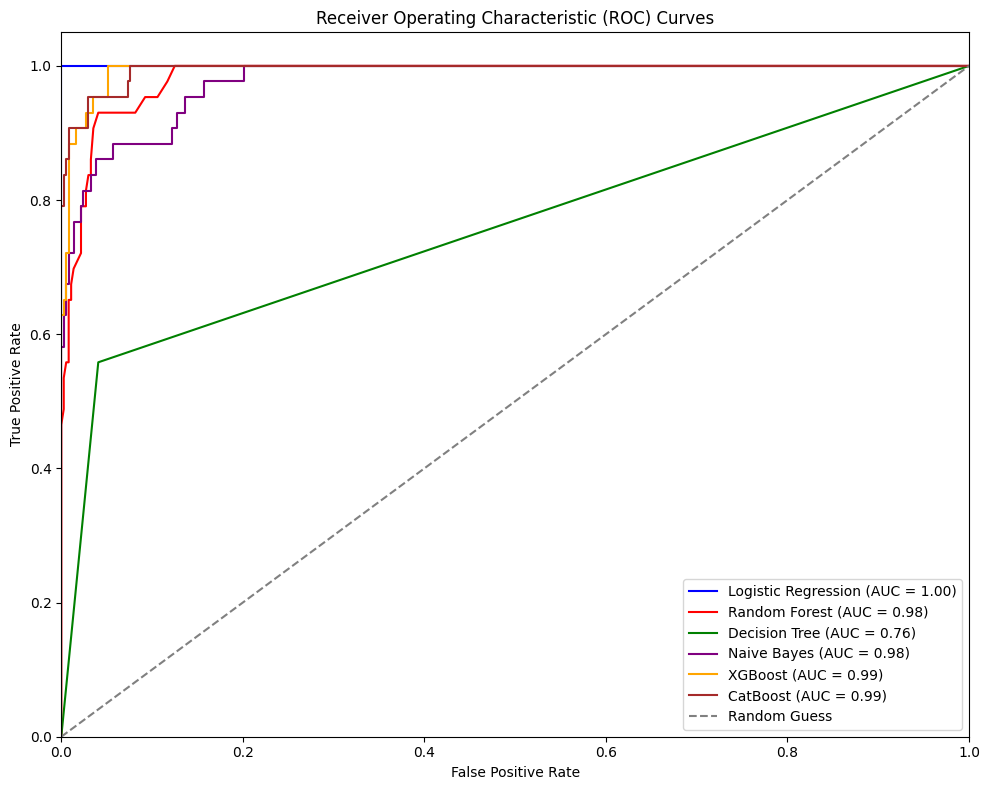

In [27]:
plot_roc_auc(model_results, X_test_processed, X_test, y_test)

Based on ROC curve, XGBoost were selected

In [28]:
# save the model
import joblib
joblib.dump(model_results['XGBoost'], 'xgb_model.pkl')

['xgb_model.pkl']

In [6]:
df.loc[0, :].to_dict()

{'Gender': 'Female',
 'Age': 37,
 'Work Pressure': 2.0,
 'Job Satisfaction': 4.0,
 'Sleep Duration': '7-8 hours',
 'Dietary Habits': 'Moderate',
 'Have you ever had suicidal thoughts ?': 'No',
 'Work Hours': 6,
 'Financial Stress': 2,
 'Family History of Mental Illness': 'No',
 'Depression': 'No'}

In [19]:
import requests
import pandas as pd
url = 'http://localhost:8000/predict'
df = pd.read_csv('Depression Professional Dataset.csv')
data = {'Gender': 'Female',
 'Age': 37,
 'Work Pressure': 2.0,
 'Job Satisfaction': 4.0,
 'Sleep Duration': '7-8 hours',
 'Dietary Habits': 'Moderate',
 'Have you ever had suicidal thoughts ?': 'No',
 'Work Hours': 6,
 'Financial Stress': 2,
 'Family History of Mental Illness': 'No'}

response = requests.post(url, json=data)
print(response.json())

{'prediction': 0, 'prediction_probability': 7.847870051591599e-07}
